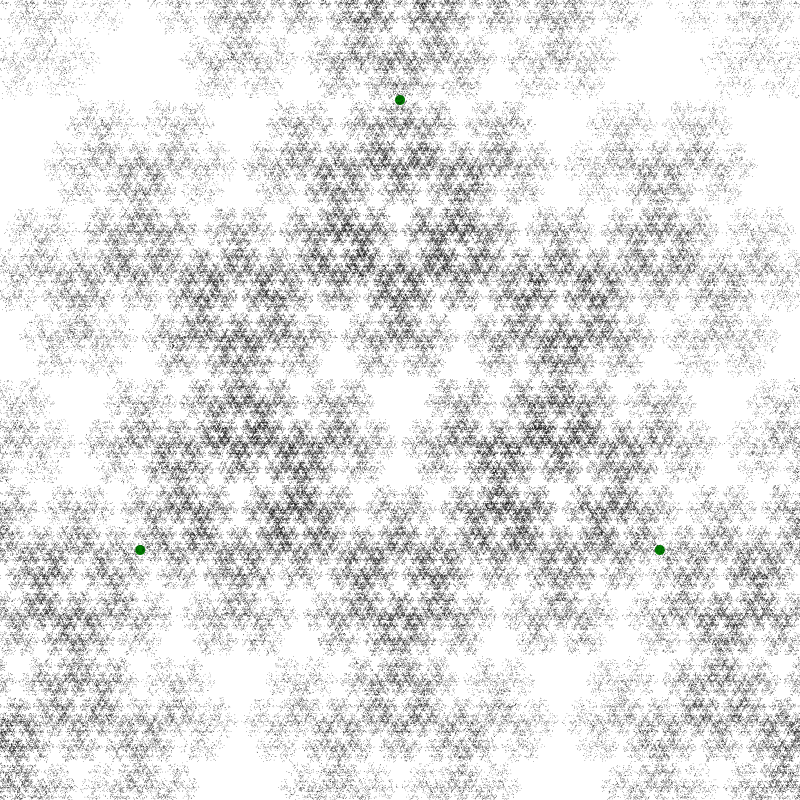

In [1]:
using Luxor
using Random
Drawing()
origin()
sethue("green")
paths = []

function toVec(pt)
    println(pt.x)
    println(pt.y)
    return [pt.x;pt.y]
end

function toPt(vec)
    return Point(vec[1],vec[2])
end

function transformPt(tm,pt)
    toPt(tm*toVec(pt))
end

function rotMat(ratio)
    radians = 2π * ratio
    return [ cos(radians) -sin(radians); sin(radians) cos(radians)]
end

bm = hcat([1; 0 ],[0 ; 1])
tm = hcat([0;-1],[1;0])
sm = hcat([5;0],[0 ;5])

ratio = 1//3
fiveRot = rotMat(ratio)

pts =[Point(0,-300)]
#pts = [Point()]
#pts = map(x->transformPt(sm,x),pts)
allpts = []
#for i in 0:3
for i in 0:(denominator(ratio)-1)
    append!(allpts,map(x->transformPt(fiveRot^i,x),pts))
    #append!(allpts,map(x->transformPt(tm^i,x),pts))
end
println(allpts)
for pt in allpts
    circle(pt, 5, :fill)
end

sethue("black")
start = Point(300,-300)
current = start
dotsize= 0.3

constants = [exp(big(1)), pi, (1+sqrt(big(5)))/2,Base.MathConstants.catalan,Base.MathConstants.eulergamma]
rng = MersenneTwister(0)
its = 1000000
for i in 1:its
    circle(current, dotsize, :fill)
    #current = midpoint(current,rand(rng, allpts))
    #current = between(current,rand(rng,allpts),1.6180327868852)
    current = between(current,rand(rng,allpts),constants[3])
end

finish()
preview()

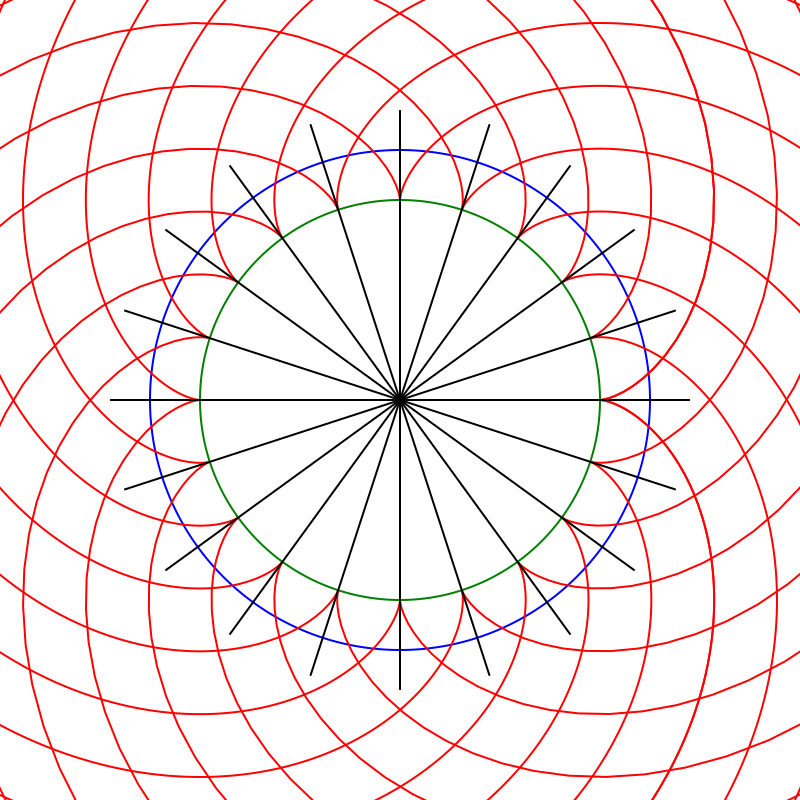

In [10]:
using Luxor

Drawing()
origin()
sethue("green")

function paramCircle(t,r)
    return Point(r*cos(t),r*sin(t)) 
end

function drawCircle(radius)
    start = 0
    step = 0.01
    endT = 2π
    prevPoint = paramCircle(start, radius)
    newpath()
    for t in step:step:endT
        currPoint = paramCircle(t,radius)
        line(prevPoint,currPoint)
        prevPoint = currPoint
    end
    strokepath()
end

function involuteCircle(t,r,a)
    xOfT = r*(cos(t)+(t-a)*sin(t))
    yOfT = r*(sin(t)-(t-a)*cos(t))
    return Point(xOfT,yOfT) 
end

radius = 200
radiusOffset = 50

drawCircle(radius)
sethue("blue")
drawCircle(radius+radiusOffset)

function drawInvolute(startRadian, radius; clockwise= true)
    start = startRadian
    if clockwise == true
        step = 0.01
        endT = startRadian+2*pi
    else
        step = -0.1
        endT = startRadian-2*pi
    end
    sethue("red")
    a = start
    prevPoint = involuteCircle(start,radius,a)
    newpath()
    for t in start+step:step:endT
        currPoint = involuteCircle(t,radius,a)
        line(prevPoint,currPoint)
        prevPoint = currPoint
    end
    strokepath()
end


rads = 0:pi/10:2*pi

r = radius+radiusOffset+40

for myrad in rads
    drawInvolute(myrad,radius)
    drawInvolute(myrad,radius,clockwise=false)
    newpath()
    sethue("black")
    line(Point(0,0),Point(r*cos(myrad),r*sin(myrad)))
    strokepath()
end

finish()
preview()

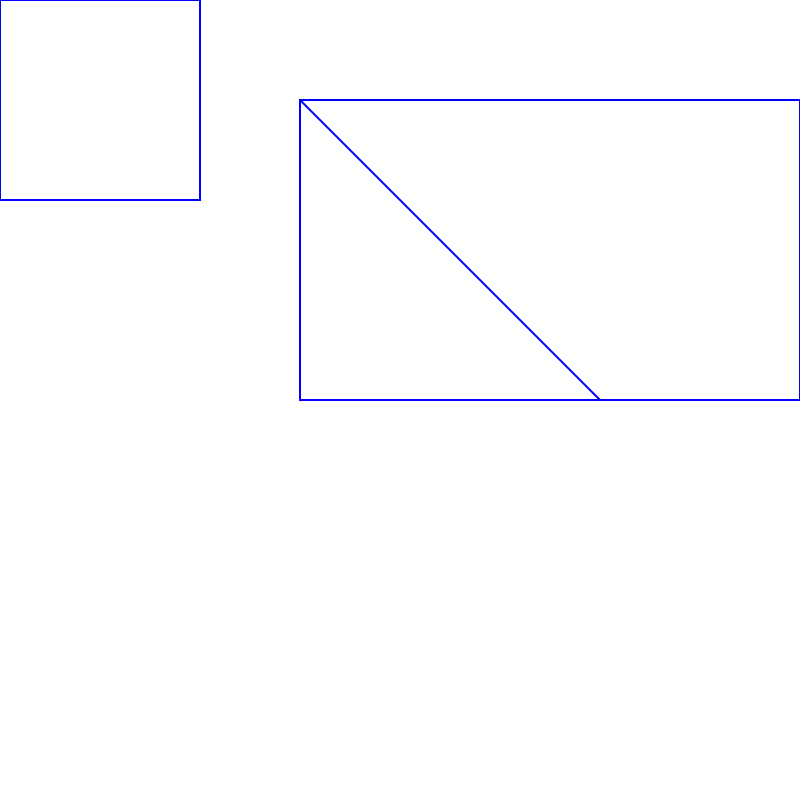

In [73]:
using Luxor

function bissect(p1,p2,p3)
    s1 = slope(p2,p3)
    s2 = slope(p2,p1)
    mins = min(s1,s2)
    maxs = max(s1,s2)
    half = (maxs-mins)/2
    rule(p2,mins+half)
end
Drawing()
sethue("blue")
r1 = rect(Point(0,0),200,200,:stroke)
r2 = rect(Point(300, 100), 500, 300,:stroke)
bb1 = BoundingBox(r1)
bb2 = BoundingBox(r2)
p1 = poly(bb1)
p2 = poly(bb2)
#for i in 1:4
    #rule(bb1[i],pi/4,boundingbox=bb1)
    #rule(bb2[i],pi/4,boundingbox=bb2)
#end
sethue("blue")
rule(Point(300,100),-3*pi/4,boundingbox=bb2)
finish()
preview()

In [67]:
Drawing()
sethue("blue")
r1 = rect(Point(0,0),200,200,:stroke)
r2 = rect(Point(300, 100), 500, 300,:stroke)
bb1 = BoundingBox(r1)
bb2 = BoundingBox(r2)
sethue("red")
p1 = poly(bb1)
p2 = poly(bb2)
l1 = polysortbyangle(p1,polycentroid(p1))
for l in l1
    println(slope(l,polycentroid(p1)))
    println(slope(polycentroid(p1),l))
end
l2 = polysortbyangle(p2,polycentroid(p2))
println(l1)
print(l2)

0.7853981633974483
3.926990816987242
2.356194490192345
5.497787143782138
3.926990816987242
0.7853981633974483
5.497787143782138
2.356194490192345
Point[Point(0.0, 0.0), Point(200.0, 0.0), Point(200.0, 200.0), Point(0.0, 200.0)]
Point[Point(300.0, 100.0), Point(800.0, 100.0), Point(800.0, 400.0), Point(300.0, 400.0)]

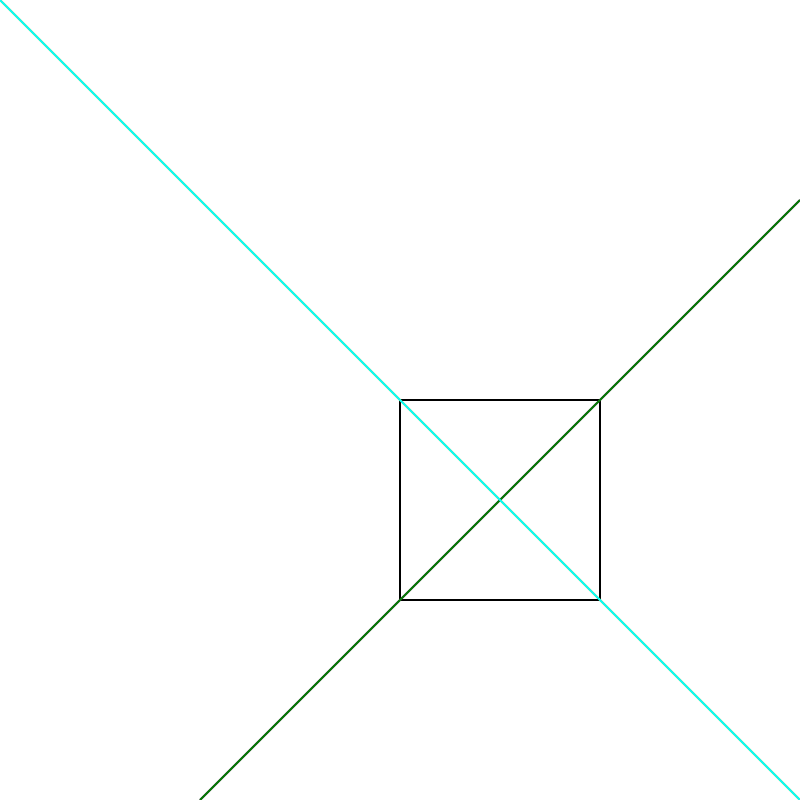

In [97]:
using Luxor

Drawing()
function bissect(p1,p2,p3,hue)
    #ps = polysortbyangle([p1,p2,p3],p2)
    #println(ps)
    #s1 = slope(p2,p3)
    #s2 = slope(p2,p1)
    s1 = slope(p3,p2)
    s2 = slope(p1,p2)
    mins = min(s1,s2)
    maxs = max(s1,s2)
    half = (maxs-mins)/2
    sethue(hue)
    rule(p2,mins+half)
end


origin()
r1 = rect(Point(0,0),200,200,:stroke)
bb1 = BoundingBox(r1)
sethue("blue")
println(bb1)

println("dddd")
# b[3] & b[4] don't exist
btl = boxtopleft(bb1)
btr = boxtopright(bb1)
bbr = boxbottomright(bb1)
bbl = boxbottomleft(bb1)
bissect(btl,btr,bbr,"purple")
bissect(btr,bbr,bbl,"orange")
bissect(bbr,bbl,btl,"green")
bissect(bbl,btl,btr,"cyan")
#TODO, add bounding boxes.
finish()
preview()

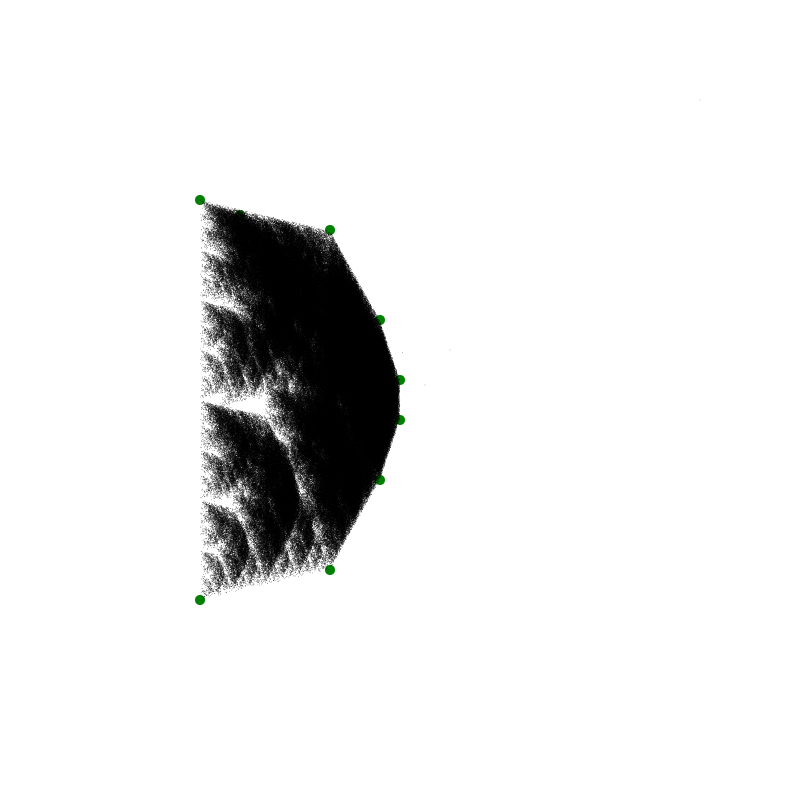

In [4]:
include("2DD.jl")